In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df.rename(columns={'30':'Age', '64':'Year90s', '1':'Axil_nodes', '1.1':'Surv_stats'}, inplace = True)

In [4]:
df2 = pd.DataFrame({'Age': [30], 'Year90s': [64], 'Axil_nodes': [1], 'Surv_stats': [1.1]})
df = pd.concat([df, df2], ignore_index= True)

In [5]:
df

,Age,Year90s,Axil_nodes,Surv_stats
0,30,62,3,1.0
1,30,65,0,1.0
2,31,59,2,1.0
3,31,65,4,1.0
4,33,58,10,1.0
...,...,...,...,...
301,76,67,0,1.0
302,77,65,3,1.0
303,78,65,1,2.0
304,83,58,2,2.0


In [6]:
df['Surv_stats'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    2
304    2
305    1
Name: Surv_stats, Length: 306, dtype: int32

In [7]:
df['survived_after5'] = df['Surv_stats'].map({1:'Yes', 2:'No'})
df.drop(columns=['Surv_stats'], inplace = True)

In [31]:
df['survived_after5'].fillna("Yes", inplace = True)

In [32]:
df.describe()

,Age,Year90s,Axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              306 non-null    int64 
 1   Year90s          306 non-null    int64 
 2   Axil_nodes       306 non-null    int64 
 3   survived_after5  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [34]:
df.isnull().sum()

Age                0
Year90s            0
Axil_nodes         0
survived_after5    0
dtype: int64

## Data has no null values
## Each datatype is int and survived after 5 years is object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              306 non-null    int64 
 1   Year90s          306 non-null    int64 
 2   Axil_nodes       306 non-null    int64 
 3   survived_after5  305 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [12]:
df.describe()

,Age,Year90s,Axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [35]:
df['survived_after5'].value_counts()

survived_after5
Yes    225
No      81
Name: count, dtype: int64

In [36]:
df['Axil_nodes'].value_counts().sort_values()

Axil_nodes
28      1
17      1
35      1
18      1
46      1
24      1
16      1
30      1
52      1
21      1
25      1
12      2
20      2
10      3
15      3
23      3
22      3
19      3
11      4
14      4
13      5
5       6
9       6
8       7
6       7
7       7
4      13
2      20
3      20
1      41
0     136
Name: count, dtype: int64

In [15]:
df['Year90s'].value_counts()

Year90s
58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

In [16]:
df['Age'].value_counts()

Age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

In [40]:
df.groupby(['survived_after5']).median()

,Age,Year90s,Axil_nodes
survived_after5,,,
No,53.0,63.0,4.0
Yes,52.0,63.0,0.0


In [18]:
df.pivot_table(index='Axil_nodes', columns='survived_after5', values='Age', aggfunc='count').fillna(0)

survived_after5,No,Yes
Axil_nodes,,
0,19.0,117.0
1,8.0,32.0
2,5.0,15.0
3,7.0,13.0
4,3.0,10.0
5,4.0,2.0
6,3.0,4.0
7,2.0,5.0
8,2.0,5.0


<Axes: xlabel='survived_after5', ylabel='count'>

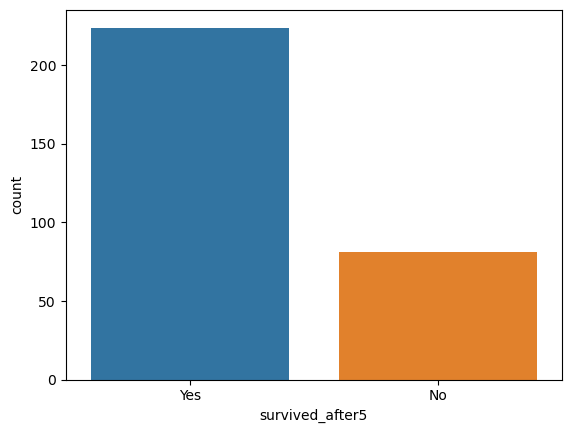

In [19]:
sns.countplot( x = 'survived_after5', data = df)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

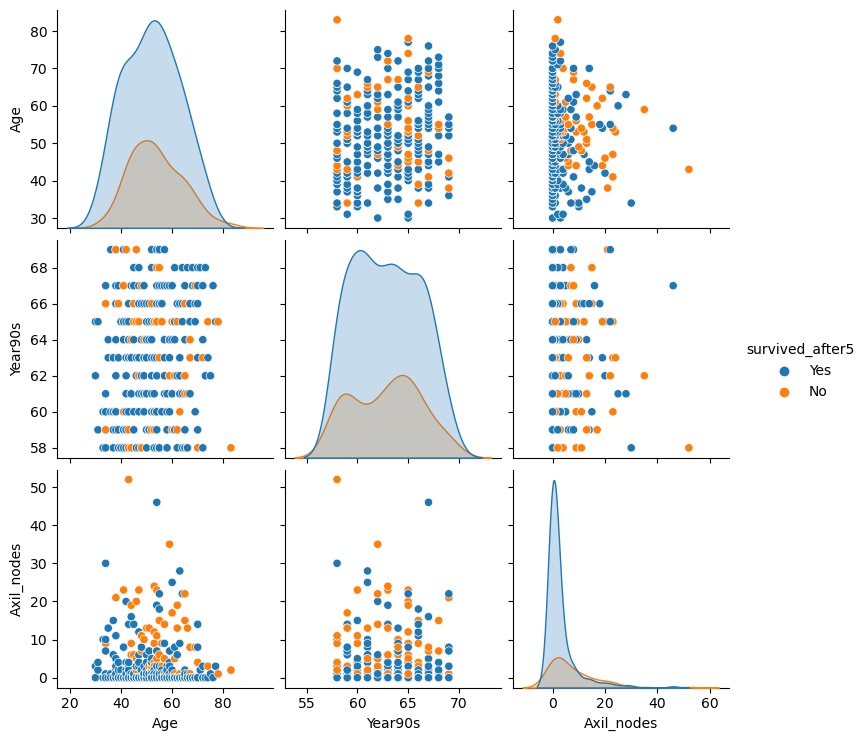

In [20]:
sns.pairplot(df, hue = 'survived_after5')

In [21]:
df['Age'].corr(df['Year90s'])

0.08952944559093891

C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\2707595076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived_after5'] == 'Yes']['Age'], hist = False, label = 'More than 5 years').legend()
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\2707595076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please a

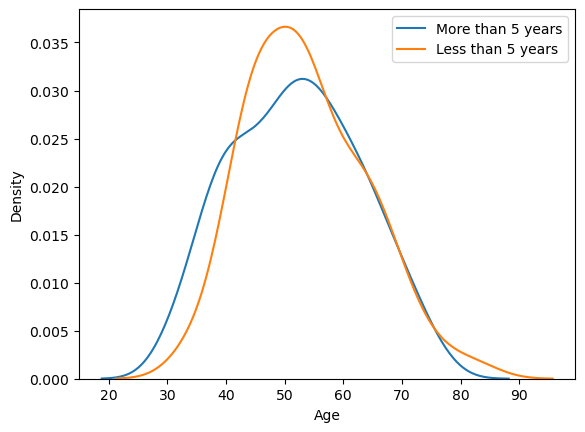

In [46]:
sns.distplot(df[df['survived_after5'] == 'Yes']['Age'], hist = False, label = 'More than 5 years').legend()
sns.distplot(df[df['survived_after5'] == 'No']['Age'], hist = False, label = 'Less than 5 years').legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\1641910480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived_after5'] == 'Yes']['Axil_nodes'], hist = False, label = 'More than 5 years').legend()
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\1641910480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

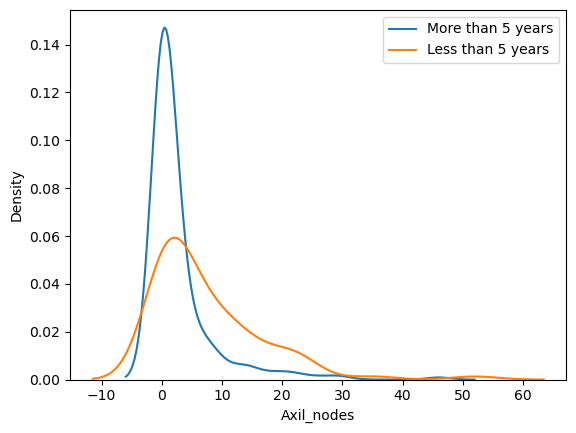

In [42]:
sns.distplot(df[df['survived_after5'] == 'Yes']['Axil_nodes'], hist = False, label = 'More than 5 years').legend()
sns.distplot(df[df['survived_after5'] == 'No']['Axil_nodes'], hist = False, label = 'Less than 5 years').legend()

## not that much corr between year and survived stats so can be droped

C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\1446716468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived_after5'] == 'Yes']['Year90s'], hist = False, label = 'More than 5 years').legend()
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\1446716468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Plea

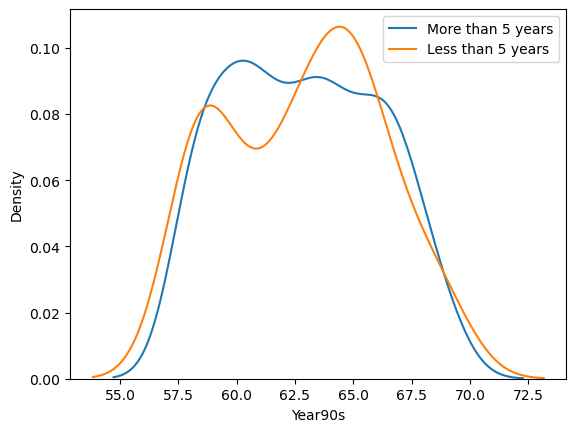

In [43]:
sns.distplot(df[df['survived_after5'] == 'Yes']['Year90s'], hist = False, label = 'More than 5 years').legend()
sns.distplot(df[df['survived_after5'] == 'No']['Year90s'], hist = False, label = 'Less than 5 years').legend()

<Axes: xlabel='survived_after5', ylabel='Age'>

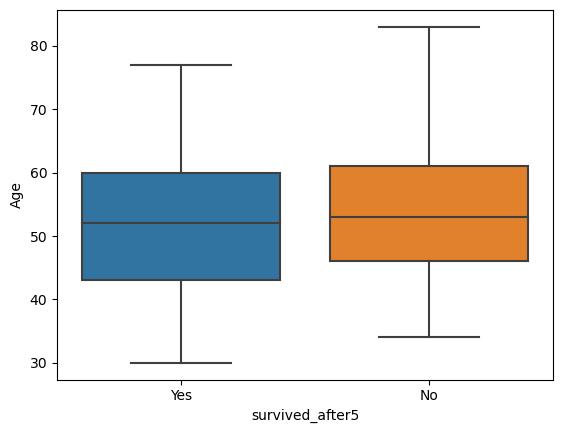

In [44]:
sns.boxplot(x = 'survived_after5', y = 'Age', data = df)

<Axes: xlabel='survived_after5', ylabel='Axil_nodes'>

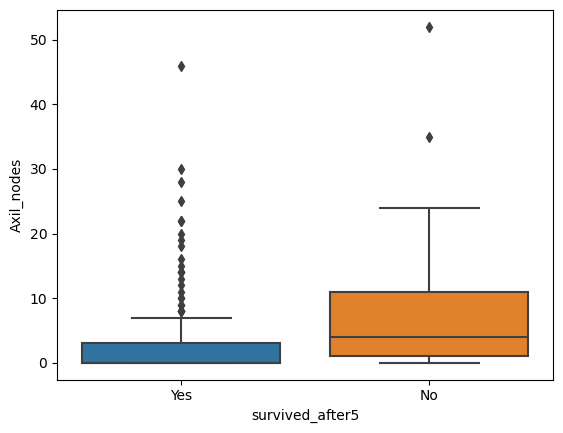

In [45]:
sns.boxplot(x = 'survived_after5', y = 'Axil_nodes', data = df)

<Axes: xlabel='survived_after5', ylabel='Year90s'>

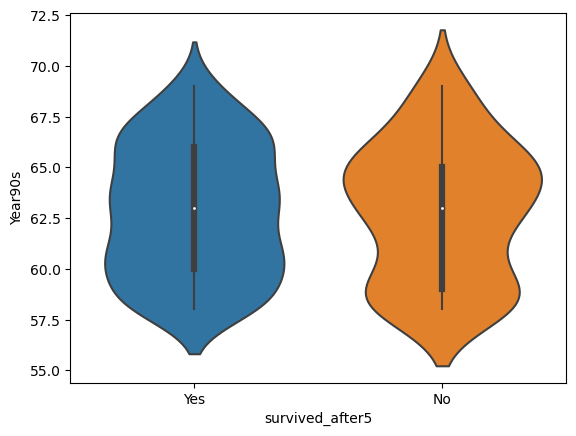

In [72]:
sns.violinplot(x = 'survived_after5', y = 'Year90s', data = df)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


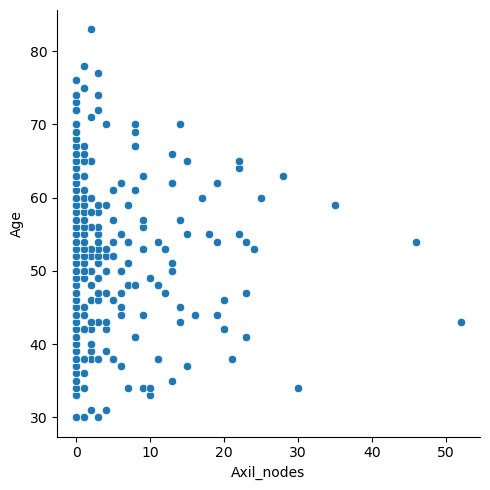

In [53]:
sns.relplot(x = 'Axil_nodes', y = 'Age', data = df, kind = 'scatter')

In [56]:
arr = df['survived_after5'].value_counts()

In [61]:
survived = (arr.iloc[0]/306)*100

In [62]:
died = (arr.iloc[1]/306)*100

In [63]:
survived

73.52941176470588

In [64]:
died

26.47058823529412

In [74]:
df['Year90s'].value_counts()

Year90s
58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

In [88]:
df.pivot_table(index = ['Year90s'], columns = ['survived_after5'], values = ['Age', 'Axil_nodes'], aggfunc= 'count')

Age     Axil_nodes    
survived_after5  No Yes         No Yes
Year90s                               
58               12  24         12  24
59                9  18          9  18
60                4  24          4  24
61                3  23          3  23
62                7  16          7  16
63                8  22          8  22
64                8  23          8  23
65               13  15         13  15
66                6  22          6  22
67                4  21          4  21
68                3  10          3  10
69                4   7          4   7

In [90]:
df.corr(numeric_only= True)

,Age,Year90s,Axil_nodes
Age,1.000000,0.089529,-0.063176
Year90s,0.089529,1.000000,-0.003764
Axil_nodes,-0.063176,-0.003764,1.000000
